In [2]:
# coding: utf-8
import pickle
# Run pretrain.py and then glimpseopt.py to get the '00099.pkl' file
with open('00099.pkl', 'rb') as f:
    x = pickle.load(f)

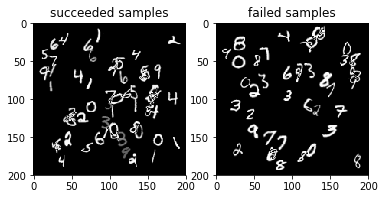

In [3]:
import matplotlib.pyplot as plt
p = sum(_x['x'] * max(0, 1 - _x['loss'].min()) for _x in x)
q = sum(_x['x'] * (_x['loss'].min() > 1) for _x in x)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(p[0].transpose(1, 2, 0))
ax[1].imshow(q[0].transpose(1, 2, 0))
ax[0].set_title('succeeded samples')
ax[1].set_title('failed samples')
plt.show()

In [4]:
import matplotlib.patches as PA
def addbox(ax, b, ec, lw):
    ax.add_patch(PA.Rectangle((b[0] - b[2] / 2, b[1] - b[3] / 2), b[2], b[3], ec=ec, lw=lw, fill=False))
    

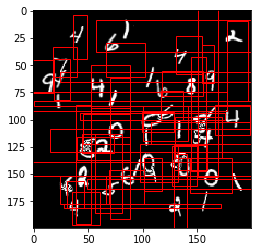

In [5]:
p = 0
for _x in x:
    if _x['loss'].min() < 0.01:
        p = p + _x['x']
        addbox(plt.gca(), _x['bh'][_x['loss'].argmin(), 0, :4] * 200, 'red', 1)
        
plt.imshow(p[0].transpose(1, 2, 0))
plt.show()

In [7]:
bh = [_x['bh'][_x['loss'].argmin(), 0, :4] * 200 for _x in x]
b = [_x['b'] for _x in x]
succ = [_x['loss'].min() < 0.01 for _x in x]
import numpy as np
def intersection(a, b):
    x1 = np.maximum(a[..., 0] - a[..., 2] / 2, b[..., 0] - b[..., 2] / 2)
    y1 = np.maximum(a[..., 1] - a[..., 3] / 2, b[..., 1] - b[..., 3] / 2)
    x2 = np.minimum(a[..., 0] + a[..., 2] / 2, b[..., 0] + b[..., 2] / 2)
    y2 = np.minimum(a[..., 1] + a[..., 3] / 2, b[..., 1] + b[..., 3] / 2)
    w = np.maximum(x2 - x1, 0)
    h = np.maximum(y2 - y1, 0)
    return w * h
def iou(a, b):
    i_area = intersection(a, b)
    a_area = a[..., 2] * a[..., 3]
    b_area = b[..., 2] * b[..., 3]
    return i_area / (a_area + b_area - i_area)
iou_dist = [iou(_b, _bh) for _b, _bh, _succ in zip(b, bh, succ) if _succ]
prec_dist = [intersection(_b, _bh) / (_bh[..., 2] * _bh[..., 3]) for _b, _bh, _succ in zip(b, bh, succ) if _succ]
rec_dist = [intersection(_b, _bh) / (_b[..., 2] * _b[..., 3]) for _b, _bh, _succ in zip(b, bh, succ) if _succ]
print(np.mean(iou_dist))
print(np.mean(prec_dist))
print(np.mean(rec_dist))


0.15895253938518542
0.1669710955290964
0.7793389671238148
